In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
df = pd.read_csv('preprocessed.csv')

In [5]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,hue,brightness_sd,saturation_sd,hue_sd,blue,blue_sd,green,green_sd,red,red_sd
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,82.805137,58.496526,80.933495,46.984021,147.046133,83.046441,127.812661,59.618615,79.571854,88.574055
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,65.296239,83.413251,67.319422,61.296055,132.472598,84.508776,137.041430,79.140584,137.619493,85.319415
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,48.908106,94.073346,70.979805,65.406756,97.464385,78.935691,106.743824,89.725921,136.728580,96.124722
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,43.298337,71.637853,74.316934,57.431210,148.388970,88.371216,161.866089,82.379306,191.924122,72.849543
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,19.093691,102.482222,85.251258,28.312941,94.287052,98.054007,110.440328,99.236678,136.537094,104.796367


In [6]:
df.shape

(37210, 46)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37210 entries, 0 to 37209
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  37210 non-null  bool   
 1   belongs_to_collection  3918 non-null   object 
 2   budget                 37210 non-null  int64  
 3   genres                 37210 non-null  object 
 4   homepage               6307 non-null   object 
 5   id                     37210 non-null  int64  
 6   imdb_id                37210 non-null  int64  
 7   original_language      37205 non-null  object 
 8   original_title         37210 non-null  object 
 9   overview               36573 non-null  object 
 10  popularity             37210 non-null  float64
 11  poster_path            37210 non-null  object 
 12  production_companies   37210 non-null  object 
 13  production_countries   37210 non-null  object 
 14  release_date           37189 non-null  object 
 15  re

In [8]:
df.isnull().sum()

adult                        0
belongs_to_collection    33292
budget                       0
genres                       0
homepage                 30903
id                           0
imdb_id                      0
original_language            5
original_title               0
overview                   637
popularity                   0
poster_path                  0
production_companies         0
production_countries         0
release_date                21
revenue                      0
runtime                    148
spoken_languages             0
status                      54
tagline                  19400
title                        0
video                        0
vote_average                 0
vote_count                   0
posterID                     0
cast                         0
crew                         0
keywords                     0
Imdb Link                    0
Title                        0
IMDB Score                  17
Genre                      122
Poster  

In [9]:
# Columns to keep:

#budget
#genres
#id
#imdb_id
#original_language
#original_title
#overview
#production_companies(main company name)
#release_date (year)
#revenue
#runtime
#status
#vote_average
#vote_count
#cast
#crew
#IMDB Score
#num_faces
#brightness
#saturation
#hue
#brightness_sd
#saturation_sd
#hue_sd
#blue
#blue_sd
#green
#green_sd
#red
#red_sd

Picking up only the important features from the dataframe to use it further.

In [10]:
columns_to_keep = ['budget','genres','id','imdb_id','original_language','original_title','overview','production_companies','release_date','revenue','runtime',
                   'status','vote_average','vote_count','cast','crew','IMDB Score','num_faces','brightness','saturation','hue','brightness_sd','saturation_sd',
                   'hue_sd','blue','blue_sd','green','green_sd','red','red_sd']

In [11]:
df.columns = df.columns.to_series().apply(lambda x: x.strip())

In [12]:
data_to_use = df[columns_to_keep]

In [13]:
data_to_use.head()

,budget,genres,id,imdb_id,original_language,original_title,overview,production_companies,release_date,revenue,...,hue,brightness_sd,saturation_sd,hue_sd,blue,blue_sd,green,green_sd,red,red_sd
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[{'name': 'Pixar Animation Studios', 'id': 3}]",1995-10-30,373554033.0,...,82.805137,58.496526,80.933495,46.984021,147.046133,83.046441,127.812661,59.618615,79.571854,88.574055
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,113497,en,Jumanji,When siblings Judy and Peter discover an encha...,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",1995-12-15,262797249.0,...,65.296239,83.413251,67.319422,61.296055,132.472598,84.508776,137.041430,79.140584,137.619493,85.319415
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",1995-12-22,0.0,...,48.908106,94.073346,70.979805,65.406756,97.464385,78.935691,106.743824,89.725921,136.728580,96.124722
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",[{'name': 'Twentieth Century Fox Film Corporat...,1995-12-22,81452156.0,...,43.298337,71.637853,74.316934,57.431210,148.388970,88.371216,161.866089,82.379306,191.924122,72.849543
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,"[{'name': 'Sandollar Productions', 'id': 5842}...",1995-02-10,76578911.0,...,19.093691,102.482222,85.251258,28.312941,94.287052,98.054007,110.440328,99.236678,136.537094,104.796367


In [14]:
data_to_use.status.value_counts()

Released           36900
Rumored              189
Post Production       50
In Production          9
Planned                7
Canceled               1
Name: status, dtype: int64

In [15]:
data_to_use.original_language.value_counts()

en    26824
fr     1975
it     1280
ja     1097
de      858
      ...  
sm        1
ne        1
gl        1
eo        1
mt        1
Name: original_language, Length: 87, dtype: int64

In [16]:
data_to_use=data_to_use[data_to_use['status']=='Released']
data_to_use=data_to_use[data_to_use['original_language']=='en']

In [17]:
data_to_use=data_to_use[data_to_use['vote_count']!=0]


In [18]:
data_to_use.reset_index(inplace=True)

In [19]:
data_to_use.head()

,index,budget,genres,id,imdb_id,original_language,original_title,overview,production_companies,release_date,...,hue,brightness_sd,saturation_sd,hue_sd,blue,blue_sd,green,green_sd,red,red_sd
0,0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[{'name': 'Pixar Animation Studios', 'id': 3}]",1995-10-30,...,82.805137,58.496526,80.933495,46.984021,147.046133,83.046441,127.812661,59.618615,79.571854,88.574055
1,1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,113497,en,Jumanji,When siblings Judy and Peter discover an encha...,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",1995-12-15,...,65.296239,83.413251,67.319422,61.296055,132.472598,84.508776,137.041430,79.140584,137.619493,85.319415
2,2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",1995-12-22,...,48.908106,94.073346,70.979805,65.406756,97.464385,78.935691,106.743824,89.725921,136.728580,96.124722
3,3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",[{'name': 'Twentieth Century Fox Film Corporat...,1995-12-22,...,43.298337,71.637853,74.316934,57.431210,148.388970,88.371216,161.866089,82.379306,191.924122,72.849543
4,4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,"[{'name': 'Sandollar Productions', 'id': 5842}...",1995-02-10,...,19.093691,102.482222,85.251258,28.312941,94.287052,98.054007,110.440328,99.236678,136.537094,104.796367


Retrieving:
1. year
2. director 
3. top 3 genres
4. top 3 actors 
5. main production company

In [20]:
data_to_use['release_date'] = pd.to_datetime(data_to_use['release_date'],errors='coerce')
data_to_use['year'] = data_to_use['release_date'].dt.year
data_to_use=data_to_use[data_to_use['year']>1980]

In [21]:
import ast
data_to_use['genres'] = data_to_use['genres'].map(lambda x: ast.literal_eval(x))
data_to_use['cast'] = data_to_use['cast'].map(lambda x: ast.literal_eval(x))
data_to_use['crew'] = data_to_use['crew'].map(lambda x: ast.literal_eval(x))

In [22]:
data_to_use.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18470 entries, 0 to 25194
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 18470 non-null  int64         
 1   budget                18470 non-null  int64         
 2   genres                18470 non-null  object        
 3   id                    18470 non-null  int64         
 4   imdb_id               18470 non-null  int64         
 5   original_language     18470 non-null  object        
 6   original_title        18470 non-null  object        
 7   overview              18453 non-null  object        
 8   production_companies  18470 non-null  object        
 9   release_date          18470 non-null  datetime64[ns]
 10  revenue               18470 non-null  float64       
 11  runtime               18470 non-null  float64       
 12  status                18470 non-null  object        
 13  vote_average    

In [23]:
# new_d=data_to_use.copy()

In [24]:
import numpy as np
def get_director(x):
    for a in x:
        if a['job']=='Director':
            
            return a['name'] 
    return np.nan

In [25]:
def get_top3(x):
    new=[]
#     if not x:
#         new.append(np.nan)
    for a in x[:3]:
        new.append(a['name']) 
    #Return empty list in case of missing/malformed data
    return new 

In [26]:
data_to_use['director']=data_to_use['crew'].apply(lambda x: get_director(x))

In [27]:
data_to_use['top3_actor']=data_to_use['cast'].apply(lambda x:get_top3(x))

In [28]:
data_to_use['top3_genres']=data_to_use['genres'].apply(lambda x:get_top3(x))

In [29]:
data_to_use[data_to_use['vote_average']==0]

,index,budget,genres,id,imdb_id,original_language,original_title,overview,production_companies,release_date,...,blue,blue_sd,green,green_sd,red,red_sd,year,director,top3_actor,top3_genres
1155,1358,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",303693,116640,en,Inside,An emotional and thrilling tale of life and de...,"[{'name': 'Elkins Entertainment', 'id': 3276},...",1996-08-25,...,49.450581,64.855975,49.537511,69.709031,62.443259,75.792616,1996.0,Arthur Penn,"[Nigel Hawthorne, Eric Stoltz, Louis Gossett, ...","[Crime, Drama, TV Movie]"
1321,1548,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",172545,116631,en,Indian Summer,A passionately committed young dancer is force...,"[{'name': 'Greentrees Films', 'id': 3798}, {'n...",1996-11-08,...,91.358556,73.076092,101.925430,81.225552,173.413291,78.562578,1996.0,Nancy Meckler,"[Jason Flemyng, Antony Sher, Dorothy Tutin]","[Comedy, Drama]"
10062,12546,0,"[{'id': 99, 'name': 'Documentary'}]",40873,1003116,en,Pete Seeger: The Power of Song,"Interviews, archival footage and home movies a...",[],2007-09-14,...,112.889144,87.051367,119.831407,86.561218,129.042644,84.329535,2007.0,NaN,"[Pete Seeger, Joan Baez, Johnny Cash]",[Documentary]
11136,14106,0,"[{'id': 35, 'name': 'Comedy'}]",252407,93240,en,Ich und Er,A man's enthusiastic penis starts talking to h...,"[{'name': 'Neue Constantin Film', 'id': 13096}]",1988-09-14,...,123.890228,105.663795,122.948085,111.142505,133.186191,113.700326,1988.0,Doris DÃ¶rrie,"[Griffin Dunne, Ellen Greene, Kelly Bishop]",[Comedy]
13502,17770,0,"[{'id': 10402, 'name': 'Music'}]",42409,204116,en,Yes: 9012 live,"The legendary YES line-up of Jon Anderson, Chr...",[],1985-11-07,...,135.040722,23.028573,135.591470,28.901245,132.301478,40.329453,1985.0,Steven Soderbergh,[],[Music]
14874,19850,0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",281583,108243,en,The Substitute,A high school substitute English teacher resor...,[],1993-09-22,...,76.896578,39.757340,76.196969,46.963617,82.964450,67.636640,1993.0,Martin Donovan,"[Amanda Donohoe, Natasha Gregson Wagner, Mark ...","[Drama, Thriller]"
14988,20013,0,"[{'id': 99, 'name': 'Documentary'}]",179179,2239034,en,American Winter,Documentary feature film that follows the pers...,"[{'name': 'HBO/Cinemax Documentary', 'id': 114...",2013-03-18,...,85.077526,56.665232,78.779657,55.610851,63.360907,55.476534,2013.0,Joe Gantz,[],[Documentary]
15306,20462,0,"[{'id': 18, 'name': 'Drama'}]",23431,1085362,en,An Angel Named Billy,"Mark Anderson, a recent stroke victim who is f...",[],2007-01-11,...,86.213100,51.335787,80.462276,48.077600,94.529676,50.708616,2007.0,Greg Osborne,"[Dustin Belt, Allison Fleming, Amy London]",[Drama]
15846,21202,0,"[{'id': 99, 'name': 'Documentary'}]",85312,1413493,en,Making the Boys,"Before Prop 8, Milk or Will &amp; Grace, befor...",[],2011-03-11,...,31.349652,70.729927,29.777869,65.395112,24.501874,69.214185,2011.0,Crayton Robey,"[William Friedkin, Mart Crowley, Larry Kramer]",[Documentary]
19199,26180,0,"[{'id': 37, 'name': 'Western'}, {'id': 10770, ...",184143,107964,en,Rio Diablo,Kenny Roger's leaves his good-guy image behind...,"[{'name': 'World International Network (WIN)',...",1993-02-28,...,71.863520,66.817005,86.246485,77.563087,98.052104,83.691099,1993.0,Rod Hardy,"[Kenny Rogers, Travis Tritt, Stacy Keach]","[Western, TV Movie]"


In [31]:
data_to_use.top3_actor.value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[]                                                  886
[Louis Theroux]                                      14
[Jimmy Carr]                                          9
[Daniel Radcliffe, Rupert Grint, Emma Watson]         7
[Eric Mabius, Kristin Booth, Crystal Lowe]            7
                                                   ... 
[Marshall Allman, Claire Holt, Tania Raymonde]        1
[Kimberly Beck, Erich Anderson, Corey Feldman]        1
[Sean Hayes, Will Sasso, Chris Diamantopoulos]        1
[Christopher Wiehl, Kym Jackson, Samantha Smith]      1
[Dan Castellaneta, Mindy Cohn, Tim Conway]            1
Name: top3_actor, Length: 17290, dtype: int64

In [32]:
data_to_use.isnull().sum()

index                     0
budget                    0
genres                    0
id                        0
imdb_id                   0
original_language         0
original_title            0
overview                 17
production_companies      0
release_date              0
revenue                   0
runtime                   0
status                    0
vote_average              0
vote_count                0
cast                      0
crew                      0
IMDB Score                2
num_faces                 0
brightness                0
saturation                0
hue                       0
brightness_sd             0
saturation_sd             0
hue_sd                    0
blue                      0
blue_sd                   0
green                     0
green_sd                  0
red                       0
red_sd                    0
year                      0
director                301
top3_actor                0
top3_genres               0
dtype: int64

In [33]:
data_to_use.head()

,index,budget,genres,id,imdb_id,original_language,original_title,overview,production_companies,release_date,...,blue,blue_sd,green,green_sd,red,red_sd,year,director,top3_actor,top3_genres
0,0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[{'name': 'Pixar Animation Studios', 'id': 3}]",1995-10-30,...,147.046133,83.046441,127.812661,59.618615,79.571854,88.574055,1995.0,John Lasseter,"[Tom Hanks, Tim Allen, Don Rickles]","[Animation, Comedy, Family]"
1,1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,113497,en,Jumanji,When siblings Judy and Peter discover an encha...,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",1995-12-15,...,132.472598,84.508776,137.041430,79.140584,137.619493,85.319415,1995.0,Joe Johnston,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]","[Adventure, Fantasy, Family]"
2,2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",1995-12-22,...,97.464385,78.935691,106.743824,89.725921,136.728580,96.124722,1995.0,Howard Deutch,"[Walter Matthau, Jack Lemmon, Ann-Margret]","[Romance, Comedy]"
3,3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",[{'name': 'Twentieth Century Fox Film Corporat...,1995-12-22,...,148.388970,88.371216,161.866089,82.379306,191.924122,72.849543,1995.0,Forest Whitaker,"[Whitney Houston, Angela Bassett, Loretta Devine]","[Comedy, Drama, Romance]"
4,4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,"[{'name': 'Sandollar Productions', 'id': 5842}...",1995-02-10,...,94.287052,98.054007,110.440328,99.236678,136.537094,104.796367,1995.0,Charles Shyer,"[Steve Martin, Diane Keaton, Martin Short]",[Comedy]


Getting clean data

In [34]:
data_to_use.isnull().sum()

index                     0
budget                    0
genres                    0
id                        0
imdb_id                   0
original_language         0
original_title            0
overview                 17
production_companies      0
release_date              0
revenue                   0
runtime                   0
status                    0
vote_average              0
vote_count                0
cast                      0
crew                      0
IMDB Score                2
num_faces                 0
brightness                0
saturation                0
hue                       0
brightness_sd             0
saturation_sd             0
hue_sd                    0
blue                      0
blue_sd                   0
green                     0
green_sd                  0
red                       0
red_sd                    0
year                      0
director                301
top3_actor                0
top3_genres               0
dtype: int64

In [35]:
data_to_use=data_to_use.dropna()

In [36]:
def clean_director(x):
    return x.lower().replace(' ','')

In [37]:
def clean_top3(x):
    new=[]
    for a in x:
        new.append(a.lower().replace(' ',''))
    return new

In [38]:
data_to_use.dtypes

index                            int64
budget                           int64
genres                          object
id                               int64
imdb_id                          int64
original_language               object
original_title                  object
overview                        object
production_companies            object
release_date            datetime64[ns]
revenue                        float64
runtime                        float64
status                          object
vote_average                   float64
vote_count                     float64
cast                            object
crew                            object
IMDB Score                     float64
num_faces                      float64
brightness                     float64
saturation                     float64
hue                            float64
brightness_sd                  float64
saturation_sd                  float64
hue_sd                         float64
blue                     

In [39]:
data_to_use['director']=data_to_use['director'].apply(lambda x: clean_director(x))

In [40]:
data_to_use['top3_actor']=data_to_use['top3_actor'].apply(lambda x:clean_top3(x))

In [41]:
data_to_use['top3_genres']=data_to_use['top3_genres'].apply(lambda x:clean_top3(x))

In [42]:
data_to_use

,index,budget,genres,id,imdb_id,original_language,original_title,overview,production_companies,release_date,...,blue,blue_sd,green,green_sd,red,red_sd,year,director,top3_actor,top3_genres
0,0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[{'name': 'Pixar Animation Studios', 'id': 3}]",1995-10-30,...,147.046133,83.046441,127.812661,59.618615,79.571854,88.574055,1995.0,johnlasseter,"[tomhanks, timallen, donrickles]","[animation, comedy, family]"
1,1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,113497,en,Jumanji,When siblings Judy and Peter discover an encha...,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",1995-12-15,...,132.472598,84.508776,137.041430,79.140584,137.619493,85.319415,1995.0,joejohnston,"[robinwilliams, jonathanhyde, kirstendunst]","[adventure, fantasy, family]"
2,2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",1995-12-22,...,97.464385,78.935691,106.743824,89.725921,136.728580,96.124722,1995.0,howarddeutch,"[waltermatthau, jacklemmon, ann-margret]","[romance, comedy]"
3,3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",[{'name': 'Twentieth Century Fox Film Corporat...,1995-12-22,...,148.388970,88.371216,161.866089,82.379306,191.924122,72.849543,1995.0,forestwhitaker,"[whitneyhouston, angelabassett, lorettadevine]","[comedy, drama, romance]"
4,4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,"[{'name': 'Sandollar Productions', 'id': 5842}...",1995-02-10,...,94.287052,98.054007,110.440328,99.236678,136.537094,104.796367,1995.0,charlesshyer,"[stevemartin, dianekeaton, martinshort]",[comedy]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25188,37198,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",27462,93991,en,Slave Girls from Beyond Infinity,Lovely and resourceful Daria and Tisa escape a...,"[{'name': 'Titan Productions', 'id': 1582}, {'...",1987-09-18,...,64.212704,60.280944,73.164743,63.175472,97.720519,80.791578,1987.0,kendixon,"[elizabethkaitan, cindybeal, donscribner]","[action, adventure, sciencefiction]"
25189,37200,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",67390,88757,en,Avenging Angel,"Molly, former baby prostitute ""Angel"" from Sun...","[{'name': 'New World Pictures', 'id': 1950}]",1985-01-11,...,110.435278,98.600907,79.230102,85.563101,70.417165,83.557221,1985.0,robertvincento'neill,"[betsyrussell, rorycalhoun, susantyrrell]","[action, thriller]"
25191,37203,0,"[{'id': 35, 'name': 'Comedy'}]",55996,82875,en,Pacific Banana,The story of a pair of Australian pilots worki...,"[{'name': 'South Australian Film Corporation, ...",1981-02-04,...,154.998322,73.813461,168.768431,86.855736,170.357535,96.989098,1981.0,johnd.lamond,"[graemeblundell, deborahgray, alysonbest]",[comedy]
25192,37204,0,[],29638,815258,en,Werewolf in a Women's Prison,No overview found.,[],2006-10-19,...,70.612806,71.015356,77.655411,72.793774,78.029180,68.817786,2006.0,jeffleroy,"[victoriademare, evaderrek, domizianoarcangeli]",[]


Replacing all the nan values with unknown and cleaning up the important features further.

In [43]:
# data_to_use['production_companies'] = data_to_use['production_companies'].replace(np.nan,'unknown')

In [44]:
data_to_use['main_production_company'] = data_to_use['production_companies'].apply(lambda x: x.split(',')[0])

In [45]:
data_to_use['main_production_company'] = data_to_use['main_production_company'].apply(lambda x: x.split(':')[-1])

Dropping unneccessary columns and filling null values to get the final df.

In [46]:
data_to_use.head(1)

,index,budget,genres,id,imdb_id,original_language,original_title,overview,production_companies,release_date,...,blue_sd,green,green_sd,red,red_sd,year,director,top3_actor,top3_genres,main_production_company
0,0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[{'name': 'Pixar Animation Studios', 'id': 3}]",1995-10-30,...,83.046441,127.812661,59.618615,79.571854,88.574055,1995.0,johnlasseter,"[tomhanks, timallen, donrickles]","[animation, comedy, family]",'Pixar Animation Studios'


In [47]:
data_to_use.isnull().sum()

index                      0
budget                     0
genres                     0
id                         0
imdb_id                    0
original_language          0
original_title             0
overview                   0
production_companies       0
release_date               0
revenue                    0
runtime                    0
status                     0
vote_average               0
vote_count                 0
cast                       0
crew                       0
IMDB Score                 0
num_faces                  0
brightness                 0
saturation                 0
hue                        0
brightness_sd              0
saturation_sd              0
hue_sd                     0
blue                       0
blue_sd                    0
green                      0
green_sd                   0
red                        0
red_sd                     0
year                       0
director                   0
top3_actor                 0
top3_genres   

In [48]:
# data_to_use.drop(['genres','production_companies','release_date','cast','crew'],axis=1,inplace=True)

In [49]:
# data_to_use.dropna(subset=['overview','original_language','status','year'],inplace=True)

In [50]:
data_to_use['IMDB Score'].fillna(data_to_use['IMDB Score'].mean(),inplace=True)

In [51]:
data_to_use

,index,budget,genres,id,imdb_id,original_language,original_title,overview,production_companies,release_date,...,blue_sd,green,green_sd,red,red_sd,year,director,top3_actor,top3_genres,main_production_company
0,0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[{'name': 'Pixar Animation Studios', 'id': 3}]",1995-10-30,...,83.046441,127.812661,59.618615,79.571854,88.574055,1995.0,johnlasseter,"[tomhanks, timallen, donrickles]","[animation, comedy, family]",'Pixar Animation Studios'
1,1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,113497,en,Jumanji,When siblings Judy and Peter discover an encha...,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",1995-12-15,...,84.508776,137.041430,79.140584,137.619493,85.319415,1995.0,joejohnston,"[robinwilliams, jonathanhyde, kirstendunst]","[adventure, fantasy, family]",'TriStar Pictures'
2,2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",1995-12-22,...,78.935691,106.743824,89.725921,136.728580,96.124722,1995.0,howarddeutch,"[waltermatthau, jacklemmon, ann-margret]","[romance, comedy]",'Warner Bros.'
3,3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",[{'name': 'Twentieth Century Fox Film Corporat...,1995-12-22,...,88.371216,161.866089,82.379306,191.924122,72.849543,1995.0,forestwhitaker,"[whitneyhouston, angelabassett, lorettadevine]","[comedy, drama, romance]",'Twentieth Century Fox Film Corporation'
4,4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,"[{'name': 'Sandollar Productions', 'id': 5842}...",1995-02-10,...,98.054007,110.440328,99.236678,136.537094,104.796367,1995.0,charlesshyer,"[stevemartin, dianekeaton, martinshort]",[comedy],'Sandollar Productions'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25188,37198,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",27462,93991,en,Slave Girls from Beyond Infinity,Lovely and resourceful Daria and Tisa escape a...,"[{'name': 'Titan Productions', 'id': 1582}, {'...",1987-09-18,...,60.280944,73.164743,63.175472,97.720519,80.791578,1987.0,kendixon,"[elizabethkaitan, cindybeal, donscribner]","[action, adventure, sciencefiction]",'Titan Productions'
25189,37200,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",67390,88757,en,Avenging Angel,"Molly, former baby prostitute ""Angel"" from Sun...","[{'name': 'New World Pictures', 'id': 1950}]",1985-01-11,...,98.600907,79.230102,85.563101,70.417165,83.557221,1985.0,robertvincento'neill,"[betsyrussell, rorycalhoun, susantyrrell]","[action, thriller]",'New World Pictures'
25191,37203,0,"[{'id': 35, 'name': 'Comedy'}]",55996,82875,en,Pacific Banana,The story of a pair of Australian pilots worki...,"[{'name': 'South Australian Film Corporation, ...",1981-02-04,...,73.813461,168.768431,86.855736,170.357535,96.989098,1981.0,johnd.lamond,"[graemeblundell, deborahgray, alysonbest]",[comedy],'South Australian Film Corporation
25192,37204,0,[],29638,815258,en,Werewolf in a Women's Prison,No overview found.,[],2006-10-19,...,71.015356,77.655411,72.793774,78.029180,68.817786,2006.0,jeffleroy,"[victoriademare, evaderrek, domizianoarcangeli]",[],[]


Converting list of genre,actors to string

In [52]:
def try_join(l):
    try:
        return ','.join(map(str, l))
    except TypeError:
        return np.nan

In [53]:
data_to_use['top3_actor'] = [try_join(l) for l in data_to_use['top3_actor']]

In [54]:
data_to_use['top3_genres'] = [try_join(l) for l in data_to_use['top3_genres']]

In [55]:
data_to_use.top3_actor.unique()

array(['tomhanks,timallen,donrickles',
       'robinwilliams,jonathanhyde,kirstendunst',
       'waltermatthau,jacklemmon,ann-margret', ...,
       'graemeblundell,deborahgray,alysonbest',
       'victoriademare,evaderrek,domizianoarcangeli',
       'damianlewis,ronlivingston,frankjohnhughes'], dtype=object)

# **EDA**

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
data_to_use['Profit'] = data_to_use['revenue'] - data_to_use['budget']

<AxesSubplot:>

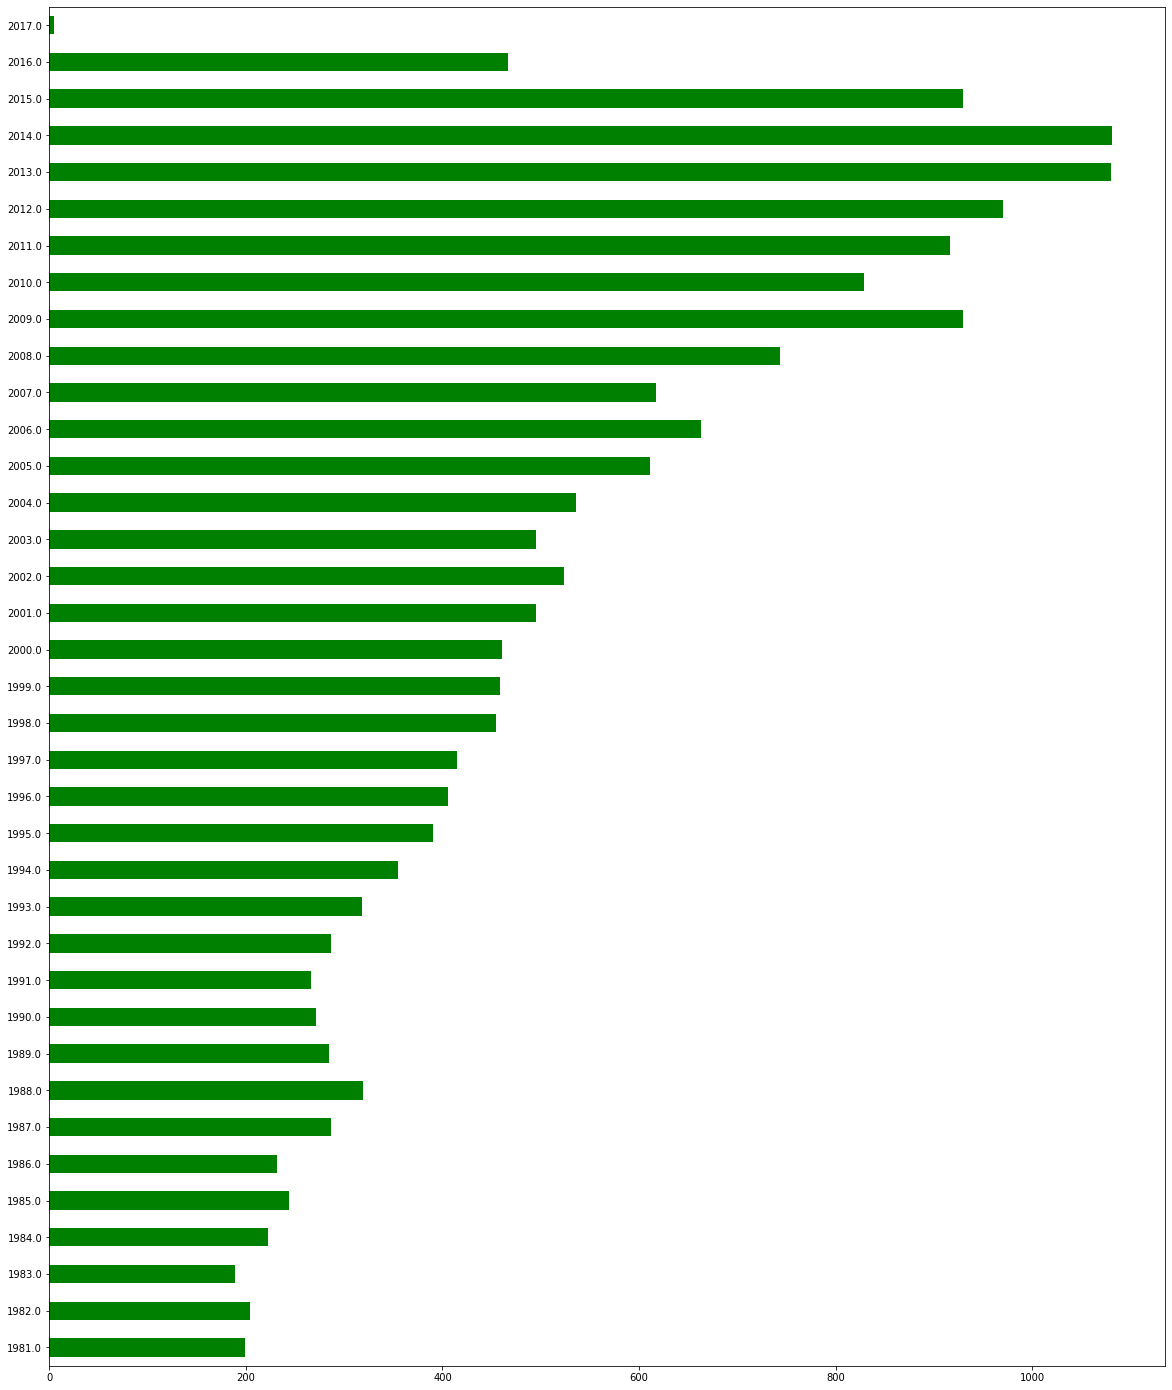

In [58]:
data_to_use.year.value_counts(dropna=False).sort_index().plot(kind='barh',color='g',figsize=(20,25))

<AxesSubplot:>

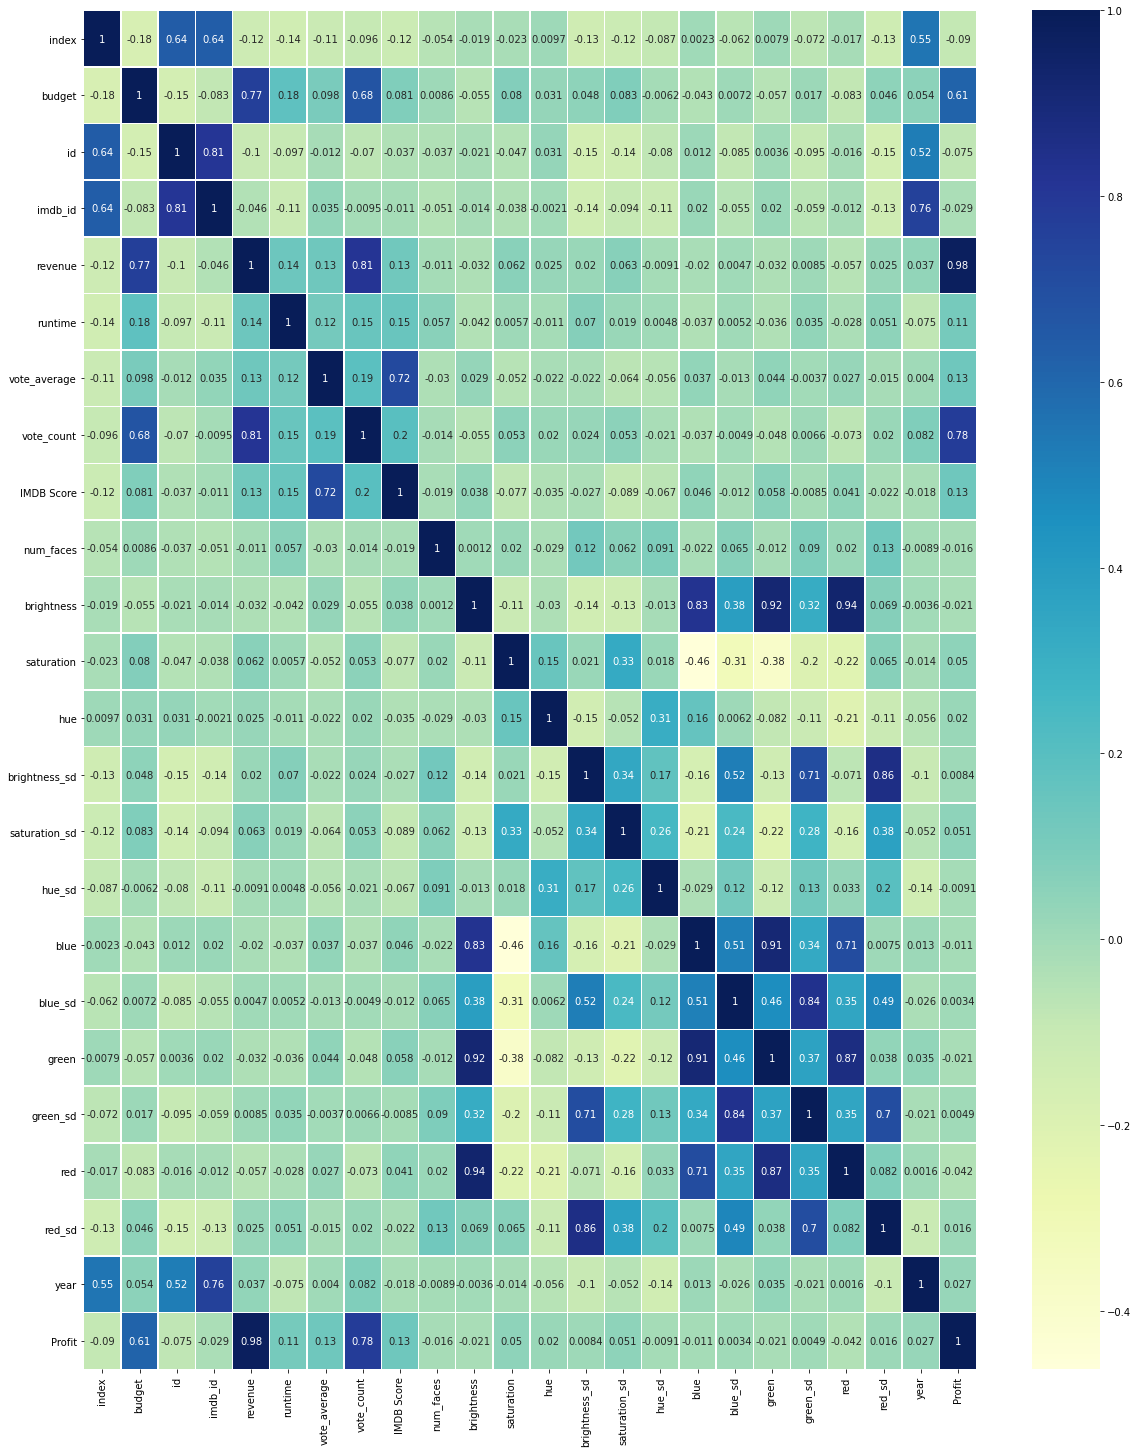

In [59]:
correlations = data_to_use.corr()
f,ax = plt.subplots(figsize=(20,25))
sns.heatmap(correlations, annot=True, cmap="YlGnBu", linewidths=.5)

In [60]:
df_1 = data_to_use[['budget','revenue','runtime','vote_average','vote_count','year','Profit']]

array([[<AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'vote_count'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'Profit'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

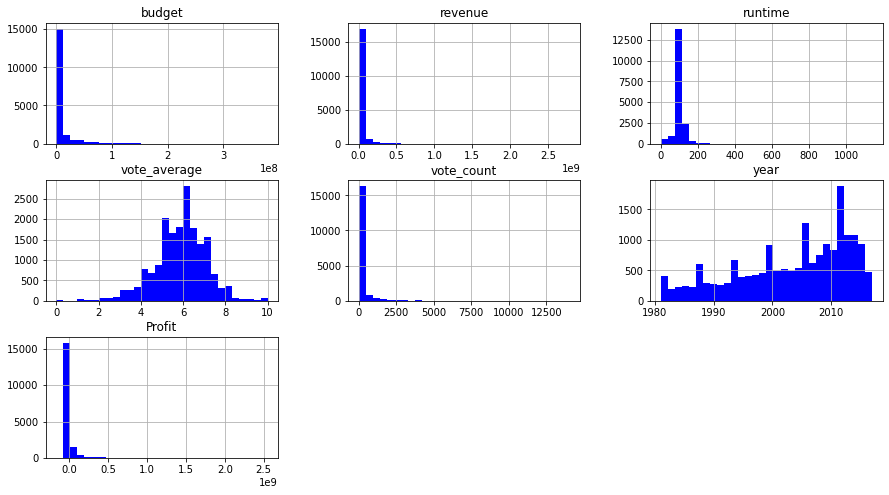

In [61]:
df_1.hist(bins=30,figsize=(15,8),color='b')

<AxesSubplot:xlabel='vote_average'>

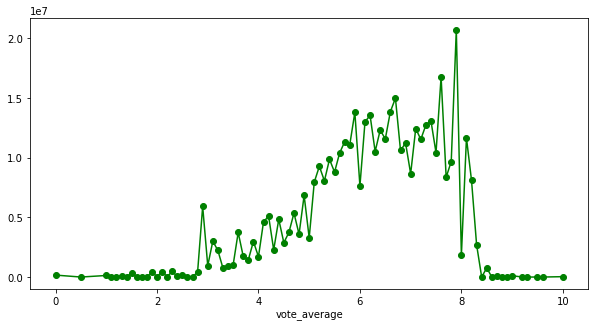

In [62]:
data_to_use.groupby('vote_average')['budget'].mean().plot(figsize=(10,5),marker='o',color='g')

<AxesSubplot:xlabel='vote_average'>

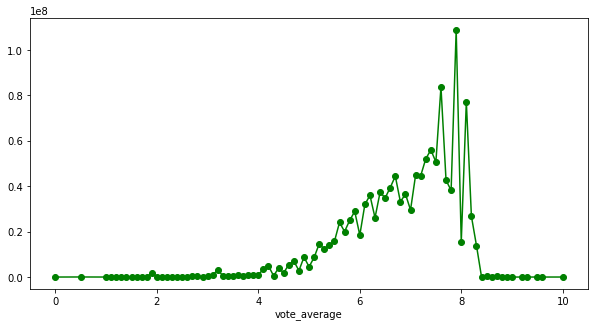

In [63]:
data_to_use.groupby('vote_average')['revenue'].mean().plot(figsize=(10,5),marker='o',color='g')

<AxesSubplot:xlabel='vote_average'>

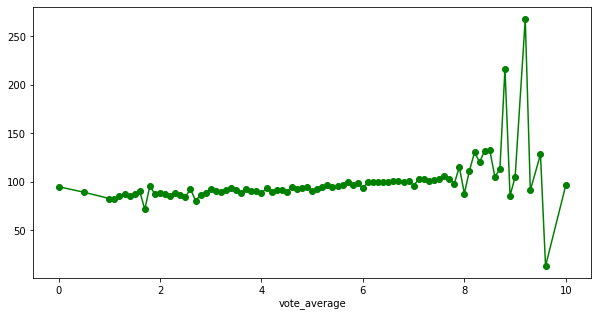

In [64]:
data_to_use.groupby('vote_average')['runtime'].mean().plot(figsize=(10,5),marker='o',color='g')

<AxesSubplot:xlabel='vote_average'>

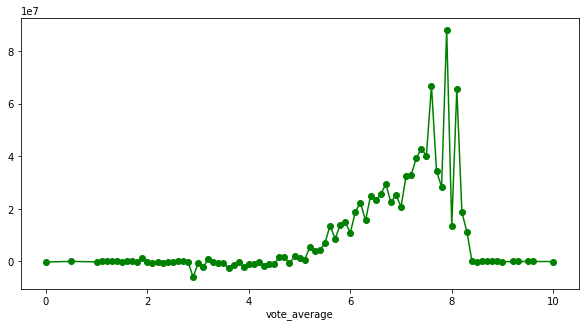

In [65]:
data_to_use.groupby('vote_average')['Profit'].mean().plot(figsize=(10,5),marker='o',color='g')

In [66]:
data_to_use.head(1)

,index,budget,genres,id,imdb_id,original_language,original_title,overview,production_companies,release_date,...,green,green_sd,red,red_sd,year,director,top3_actor,top3_genres,main_production_company,Profit
0,0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[{'name': 'Pixar Animation Studios', 'id': 3}]",1995-10-30,...,127.812661,59.618615,79.571854,88.574055,1995.0,johnlasseter,"tomhanks,timallen,donrickles","animation,comedy,family",'Pixar Animation Studios',343554033.0


In [67]:
data_to_use['overview'][0]

"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences."

In [68]:
data_to_use_2=data_to_use.copy()

In [69]:
data_to_use_2

,index,budget,genres,id,imdb_id,original_language,original_title,overview,production_companies,release_date,...,green,green_sd,red,red_sd,year,director,top3_actor,top3_genres,main_production_company,Profit
0,0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[{'name': 'Pixar Animation Studios', 'id': 3}]",1995-10-30,...,127.812661,59.618615,79.571854,88.574055,1995.0,johnlasseter,"tomhanks,timallen,donrickles","animation,comedy,family",'Pixar Animation Studios',343554033.0
1,1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,113497,en,Jumanji,When siblings Judy and Peter discover an encha...,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",1995-12-15,...,137.041430,79.140584,137.619493,85.319415,1995.0,joejohnston,"robinwilliams,jonathanhyde,kirstendunst","adventure,fantasy,family",'TriStar Pictures',197797249.0
2,2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",1995-12-22,...,106.743824,89.725921,136.728580,96.124722,1995.0,howarddeutch,"waltermatthau,jacklemmon,ann-margret","romance,comedy",'Warner Bros.',0.0
3,3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",[{'name': 'Twentieth Century Fox Film Corporat...,1995-12-22,...,161.866089,82.379306,191.924122,72.849543,1995.0,forestwhitaker,"whitneyhouston,angelabassett,lorettadevine","comedy,drama,romance",'Twentieth Century Fox Film Corporation',65452156.0
4,4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,"[{'name': 'Sandollar Productions', 'id': 5842}...",1995-02-10,...,110.440328,99.236678,136.537094,104.796367,1995.0,charlesshyer,"stevemartin,dianekeaton,martinshort",comedy,'Sandollar Productions',76578911.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25188,37198,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",27462,93991,en,Slave Girls from Beyond Infinity,Lovely and resourceful Daria and Tisa escape a...,"[{'name': 'Titan Productions', 'id': 1582}, {'...",1987-09-18,...,73.164743,63.175472,97.720519,80.791578,1987.0,kendixon,"elizabethkaitan,cindybeal,donscribner","action,adventure,sciencefiction",'Titan Productions',0.0
25189,37200,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",67390,88757,en,Avenging Angel,"Molly, former baby prostitute ""Angel"" from Sun...","[{'name': 'New World Pictures', 'id': 1950}]",1985-01-11,...,79.230102,85.563101,70.417165,83.557221,1985.0,robertvincento'neill,"betsyrussell,rorycalhoun,susantyrrell","action,thriller",'New World Pictures',0.0
25191,37203,0,"[{'id': 35, 'name': 'Comedy'}]",55996,82875,en,Pacific Banana,The story of a pair of Australian pilots worki...,"[{'name': 'South Australian Film Corporation, ...",1981-02-04,...,168.768431,86.855736,170.357535,96.989098,1981.0,johnd.lamond,"graemeblundell,deborahgray,alysonbest",comedy,'South Australian Film Corporation,0.0
25192,37204,0,[],29638,815258,en,Werewolf in a Women's Prison,No overview found.,[],2006-10-19,...,77.655411,72.793774,78.029180,68.817786,2006.0,jeffleroy,"victoriademare,evaderrek,domizianoarcangeli",,[],0.0


In [70]:
import re
import string

alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
 
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

remove_n = lambda x: re.sub("\n", " ", x)

remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)

single_characters = lambda x: re.sub(r'\^[a-zA-Z]\s+', ' ', x) 

special_char = lambda x: re.sub(r'\W', ' ', str(x))

data_to_use['overview'] = data_to_use['overview'].map(single_characters).map(special_char).map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

data_to_use['overview'][0]

'led by woody  andy s toys live happily in his room until andy s birthday brings buzz lightyear onto the scene  afraid of losing his place in andy s heart  woody plots against buzz  but when circumstances separate buzz and woody from their owner  the duo eventually learns to put aside their differences '

In [71]:
a=data_to_use['director'].value_counts()
a

woodyallen           38
clinteastwood        28
stevensoderbergh     28
spikelee             27
stephenfrears        26
                     ..
laurencerees          1
russparr              1
robertj.rosenthal     1
jordanmelamed         1
donsiegel             1
Name: director, Length: 8999, dtype: int64

In [72]:
data_to_use_copy=data_to_use.copy()

In [73]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ANJALI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [74]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [75]:
def removeStopWords(text):
    x=[]
    for i in text.split():
        if i not in stopwords.words('english'):
            x.append(i)
    y=x[:]
    x.clear()
    return y

In [76]:
data_to_use_copy['overview'] = data_to_use['overview'].apply(removeStopWords)

In [77]:
from nltk.stem import WordNetLemmatizer
import string
#nltk.download('stopwords')
#nltk.download('wordnet')
lmt=WordNetLemmatizer()

In [78]:
# from nltk.stem.porter import PorterStemmer
# ps = PorterStemmer()

In [79]:
def stemText(text):
    z=[]
    for i in text:
        z.append(ps.stem(i))
    w=z[:]
    z.clear()
    return w

In [80]:
def lemmText(text):
    z=[]
    for i in text:
        z.append(lmt.lemmatize(i))
    w=z[:]
    z.clear()
    return w

In [81]:
data_to_use_copy['overview'][0]

['led',
 'woody',
 'andy',
 'toys',
 'live',
 'happily',
 'room',
 'andy',
 'birthday',
 'brings',
 'buzz',
 'lightyear',
 'onto',
 'scene',
 'afraid',
 'losing',
 'place',
 'andy',
 'heart',
 'woody',
 'plots',
 'buzz',
 'circumstances',
 'separate',
 'buzz',
 'woody',
 'owner',
 'duo',
 'eventually',
 'learns',
 'put',
 'aside',
 'differences']

In [82]:
data_to_use_copy['overview'] = data_to_use_copy['overview'].apply(lemmText)

LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/wordnet[0m

  Searched in:
    - 'C:\\Users\\ANJALI/nltk_data'
    - 'c:\\users\\anjali\\appdata\\local\\programs\\python\\python37\\nltk_data'
    - 'c:\\users\\anjali\\appdata\\local\\programs\\python\\python37\\share\\nltk_data'
    - 'c:\\users\\anjali\\appdata\\local\\programs\\python\\python37\\lib\\nltk_data'
    - 'C:\\Users\\ANJALI\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [83]:
data_to_use_copy['overview'][0]

['led',
 'woody',
 'andy',
 'toys',
 'live',
 'happily',
 'room',
 'andy',
 'birthday',
 'brings',
 'buzz',
 'lightyear',
 'onto',
 'scene',
 'afraid',
 'losing',
 'place',
 'andy',
 'heart',
 'woody',
 'plots',
 'buzz',
 'circumstances',
 'separate',
 'buzz',
 'woody',
 'owner',
 'duo',
 'eventually',
 'learns',
 'put',
 'aside',
 'differences']

In [84]:
data_to_use_copy['overview'] = data_to_use_copy['overview'].apply(lambda x:" ".join(x))

In [85]:
data_to_use_copy['overview'][150]

'dreary urban landscape anonymous canadian city dark comedy group twentysomethings looking love meaning film focuses roommates david gay waiter given acting career candy book reviewer also david ex lover david candy lives entangled david friends candy dates'

In [86]:
cv = CountVectorizer(max_features=5000, stop_words=stopwords.words('english'))

In [87]:
# X = cv.fit_transform(data_to_use['overview']).toarray()

In [88]:
# X.shape

In [89]:
data_to_use_copy.columns

Index(['index', 'budget', 'genres', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'production_companies', 'release_date',
       'revenue', 'runtime', 'status', 'vote_average', 'vote_count', 'cast',
       'crew', 'IMDB Score', 'num_faces', 'brightness', 'saturation', 'hue',
       'brightness_sd', 'saturation_sd', 'hue_sd', 'blue', 'blue_sd', 'green',
       'green_sd', 'red', 'red_sd', 'year', 'director', 'top3_actor',
       'top3_genres', 'main_production_company', 'Profit'],
      dtype='object')

In [90]:
data_to_use_copy.top3_actor

0                       tomhanks,timallen,donrickles
1            robinwilliams,jonathanhyde,kirstendunst
2               waltermatthau,jacklemmon,ann-margret
3         whitneyhouston,angelabassett,lorettadevine
4                stevemartin,dianekeaton,martinshort
                            ...                     
25188          elizabethkaitan,cindybeal,donscribner
25189          betsyrussell,rorycalhoun,susantyrrell
25191          graemeblundell,deborahgray,alysonbest
25192    victoriademare,evaderrek,domizianoarcangeli
25194      damianlewis,ronlivingston,frankjohnhughes
Name: top3_actor, Length: 18153, dtype: object

In [91]:
columns=['id','overview','num_faces', 'brightness', 'saturation',
       'hue', 'brightness_sd', 'saturation_sd', 'hue_sd', 'blue', 'blue_sd',
       'green', 'green_sd', 'red', 'red_sd','director', 'top3_actor',
       'top3_genres','vote_average']
new_features=data_to_use_copy[columns]

In [92]:
new_features

,id,overview,num_faces,brightness,saturation,hue,brightness_sd,saturation_sd,hue_sd,blue,blue_sd,green,green_sd,red,red_sd,director,top3_actor,top3_genres,vote_average
0,862,led woody andy toys live happily room andy bir...,0.0,184.775439,190.399400,82.805137,58.496526,80.933495,46.984021,147.046133,83.046441,127.812661,59.618615,79.571854,88.574055,johnlasseter,"tomhanks,timallen,donrickles","animation,comedy,family",7.7
1,8844,siblings judy peter discover enchanted board g...,0.0,166.807096,91.547633,65.296239,83.413251,67.319422,61.296055,132.472598,84.508776,137.041430,79.140584,137.619493,85.319415,joejohnston,"robinwilliams,jonathanhyde,kirstendunst","adventure,fantasy,family",6.9
2,15602,family wedding reignites ancient feud next doo...,0.0,139.380694,112.907880,48.908106,94.073346,70.979805,65.406756,97.464385,78.935691,106.743824,89.725921,136.728580,96.124722,howarddeutch,"waltermatthau,jacklemmon,ann-margret","romance,comedy",6.5
3,31357,cheated mistreated stepped women holding breat...,1.0,193.179470,78.009035,43.298337,71.637853,74.316934,57.431210,148.388970,88.371216,161.866089,82.379306,191.924122,72.849543,forestwhitaker,"whitneyhouston,angelabassett,lorettadevine","comedy,drama,romance",6.1
4,11862,george banks recovered daughter wedding receiv...,1.0,140.167369,120.689856,19.093691,102.482222,85.251258,28.312941,94.287052,98.054007,110.440328,99.236678,136.537094,104.796367,charlesshyer,"stevemartin,dianekeaton,martinshort",comedy,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25188,27462,lovely resourceful daria tisa escape space gul...,0.0,104.766796,104.106333,59.054246,84.085516,59.591266,61.747930,64.212704,60.280944,73.164743,63.175472,97.720519,80.791578,kendixon,"elizabethkaitan,cindybeal,donscribner","action,adventure,sciencefiction",5.8
25189,67390,molly former baby prostitute angel sunset boul...,0.0,127.690170,156.663817,86.082302,98.041284,90.487837,56.047813,110.435278,98.600907,79.230102,85.563101,70.417165,83.557221,robertvincento'neill,"betsyrussell,rorycalhoun,susantyrrell","action,thriller",5.4
25191,55996,story pair australian pilots working small sou...,3.0,195.902057,103.207761,46.270369,70.070909,79.695590,44.903833,154.998322,73.813461,168.768431,86.855736,170.357535,96.989098,johnd.lamond,"graemeblundell,deborahgray,alysonbest",comedy,4.8
25192,29638,overview found,0.0,93.429324,114.779783,61.977717,76.735547,78.534552,50.449981,70.612806,71.015356,77.655411,72.793774,78.029180,68.817786,jeffleroy,"victoriademare,evaderrek,domizianoarcangeli",,4.0


In [93]:
copy=new_features.copy()
clean_actor=copy[copy['top3_actor']!='']
clean_genres=clean_actor[clean_actor['top3_genres']!='']
clean_data=clean_genres[clean_genres['overview']!='']
clean_data

,id,overview,num_faces,brightness,saturation,hue,brightness_sd,saturation_sd,hue_sd,blue,blue_sd,green,green_sd,red,red_sd,director,top3_actor,top3_genres,vote_average
0,862,led woody andy toys live happily room andy bir...,0.0,184.775439,190.399400,82.805137,58.496526,80.933495,46.984021,147.046133,83.046441,127.812661,59.618615,79.571854,88.574055,johnlasseter,"tomhanks,timallen,donrickles","animation,comedy,family",7.7
1,8844,siblings judy peter discover enchanted board g...,0.0,166.807096,91.547633,65.296239,83.413251,67.319422,61.296055,132.472598,84.508776,137.041430,79.140584,137.619493,85.319415,joejohnston,"robinwilliams,jonathanhyde,kirstendunst","adventure,fantasy,family",6.9
2,15602,family wedding reignites ancient feud next doo...,0.0,139.380694,112.907880,48.908106,94.073346,70.979805,65.406756,97.464385,78.935691,106.743824,89.725921,136.728580,96.124722,howarddeutch,"waltermatthau,jacklemmon,ann-margret","romance,comedy",6.5
3,31357,cheated mistreated stepped women holding breat...,1.0,193.179470,78.009035,43.298337,71.637853,74.316934,57.431210,148.388970,88.371216,161.866089,82.379306,191.924122,72.849543,forestwhitaker,"whitneyhouston,angelabassett,lorettadevine","comedy,drama,romance",6.1
4,11862,george banks recovered daughter wedding receiv...,1.0,140.167369,120.689856,19.093691,102.482222,85.251258,28.312941,94.287052,98.054007,110.440328,99.236678,136.537094,104.796367,charlesshyer,"stevemartin,dianekeaton,martinshort",comedy,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,85200,movie company filming murder mystery island so...,0.0,182.565091,173.466189,98.721476,59.420824,74.265305,64.191197,122.481007,76.835653,71.434522,72.402194,139.631452,86.744059,williamt.naud,"rickdean,jeaninemarie,rongardner",horror,2.0
25188,27462,lovely resourceful daria tisa escape space gul...,0.0,104.766796,104.106333,59.054246,84.085516,59.591266,61.747930,64.212704,60.280944,73.164743,63.175472,97.720519,80.791578,kendixon,"elizabethkaitan,cindybeal,donscribner","action,adventure,sciencefiction",5.8
25189,67390,molly former baby prostitute angel sunset boul...,0.0,127.690170,156.663817,86.082302,98.041284,90.487837,56.047813,110.435278,98.600907,79.230102,85.563101,70.417165,83.557221,robertvincento'neill,"betsyrussell,rorycalhoun,susantyrrell","action,thriller",5.4
25191,55996,story pair australian pilots working small sou...,3.0,195.902057,103.207761,46.270369,70.070909,79.695590,44.903833,154.998322,73.813461,168.768431,86.855736,170.357535,96.989098,johnd.lamond,"graemeblundell,deborahgray,alysonbest",comedy,4.8


In [94]:
clean_data['top3_actor']=clean_data['top3_actor'].apply(lambda x: x.split(','))
clean_data['top3_genres']=clean_data['top3_genres'].apply(lambda x: x.split(','))

c:\users\anjali\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\anjali\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [95]:
clean_data['top3_actor']=clean_data['top3_actor'].apply(lambda x: " ".join(x))
clean_data['top3_genres']=clean_data['top3_genres'].apply(lambda x: " ".join(x))

c:\users\anjali\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\anjali\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [96]:
clean_data

,id,overview,num_faces,brightness,saturation,hue,brightness_sd,saturation_sd,hue_sd,blue,blue_sd,green,green_sd,red,red_sd,director,top3_actor,top3_genres,vote_average
0,862,led woody andy toys live happily room andy bir...,0.0,184.775439,190.399400,82.805137,58.496526,80.933495,46.984021,147.046133,83.046441,127.812661,59.618615,79.571854,88.574055,johnlasseter,tomhanks timallen donrickles,animation comedy family,7.7
1,8844,siblings judy peter discover enchanted board g...,0.0,166.807096,91.547633,65.296239,83.413251,67.319422,61.296055,132.472598,84.508776,137.041430,79.140584,137.619493,85.319415,joejohnston,robinwilliams jonathanhyde kirstendunst,adventure fantasy family,6.9
2,15602,family wedding reignites ancient feud next doo...,0.0,139.380694,112.907880,48.908106,94.073346,70.979805,65.406756,97.464385,78.935691,106.743824,89.725921,136.728580,96.124722,howarddeutch,waltermatthau jacklemmon ann-margret,romance comedy,6.5
3,31357,cheated mistreated stepped women holding breat...,1.0,193.179470,78.009035,43.298337,71.637853,74.316934,57.431210,148.388970,88.371216,161.866089,82.379306,191.924122,72.849543,forestwhitaker,whitneyhouston angelabassett lorettadevine,comedy drama romance,6.1
4,11862,george banks recovered daughter wedding receiv...,1.0,140.167369,120.689856,19.093691,102.482222,85.251258,28.312941,94.287052,98.054007,110.440328,99.236678,136.537094,104.796367,charlesshyer,stevemartin dianekeaton martinshort,comedy,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,85200,movie company filming murder mystery island so...,0.0,182.565091,173.466189,98.721476,59.420824,74.265305,64.191197,122.481007,76.835653,71.434522,72.402194,139.631452,86.744059,williamt.naud,rickdean jeaninemarie rongardner,horror,2.0
25188,27462,lovely resourceful daria tisa escape space gul...,0.0,104.766796,104.106333,59.054246,84.085516,59.591266,61.747930,64.212704,60.280944,73.164743,63.175472,97.720519,80.791578,kendixon,elizabethkaitan cindybeal donscribner,action adventure sciencefiction,5.8
25189,67390,molly former baby prostitute angel sunset boul...,0.0,127.690170,156.663817,86.082302,98.041284,90.487837,56.047813,110.435278,98.600907,79.230102,85.563101,70.417165,83.557221,robertvincento'neill,betsyrussell rorycalhoun susantyrrell,action thriller,5.4
25191,55996,story pair australian pilots working small sou...,3.0,195.902057,103.207761,46.270369,70.070909,79.695590,44.903833,154.998322,73.813461,168.768431,86.855736,170.357535,96.989098,johnd.lamond,graemeblundell deborahgray alysonbest,comedy,4.8


In [97]:
clean_data['top3_actor'].value_counts()

jimmycarr                                  9
louistheroux                               9
louisc.k.                                  7
danielradcliffe rupertgrint emmawatson     7
ericmabius kristinbooth crystallowe        6
                                          ..
oliviawilde jasonbateman jennyslate        1
niilosyvã¤oja katioutinen perttisveholm    1
evanglodell jessiewiseman tylerdawson      1
billmurray karenallen johnforsythe         1
joonasnordman saijalentonen sarihavas      1
Name: top3_actor, Length: 16715, dtype: int64

In [98]:
clean_data=clean_data[clean_data['vote_average']!=0]

In [99]:
clean_data.reset_index(inplace=True)

In [100]:
clean_data['vote_average']=clean_data['vote_average'].astype('int')

c:\users\anjali\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Model one : considering only overview for predicting avg ratings

In [101]:
# cv = CountVectorizer(max_features=10000, stop_words='english')

In [102]:
c=['overview','director','top3_actor','top3_genres', 'vote_average']
col=clean_data[c]

In [103]:
x1=col.iloc[0:,0:4]
y1=col.iloc[:,-1]

In [104]:
x1

,overview,director,top3_actor,top3_genres
0,led woody andy toys live happily room andy bir...,johnlasseter,tomhanks timallen donrickles,animation comedy family
1,siblings judy peter discover enchanted board g...,joejohnston,robinwilliams jonathanhyde kirstendunst,adventure fantasy family
2,family wedding reignites ancient feud next doo...,howarddeutch,waltermatthau jacklemmon ann-margret,romance comedy
3,cheated mistreated stepped women holding breat...,forestwhitaker,whitneyhouston angelabassett lorettadevine,comedy drama romance
4,george banks recovered daughter wedding receiv...,charlesshyer,stevemartin dianekeaton martinshort,comedy
...,...,...,...,...
16961,movie company filming murder mystery island so...,williamt.naud,rickdean jeaninemarie rongardner,horror
16962,lovely resourceful daria tisa escape space gul...,kendixon,elizabethkaitan cindybeal donscribner,action adventure sciencefiction
16963,molly former baby prostitute angel sunset boul...,robertvincento'neill,betsyrussell rorycalhoun susantyrrell,action thriller
16964,story pair australian pilots working small sou...,johnd.lamond,graemeblundell deborahgray alysonbest,comedy


In [105]:
from sklearn.model_selection import train_test_split

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.25)

In [107]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((12724, 4), (4242, 4), (12724,), (4242,))

In [108]:
y_train, y_test

(15105    5
 11753    4
 7979     3
 15184    3
 722      5
         ..
 558      5
 8960     4
 11606    3
 6386     6
 479      5
 Name: vote_average, Length: 12724, dtype: int32,
 4693     5
 10032    6
 14925    8
 16653    7
 826      8
         ..
 13504    5
 1043     5
 8073     5
 2792     5
 8525     3
 Name: vote_average, Length: 4242, dtype: int32)

In [109]:
x_train

,overview,director,top3_actor,top3_genres
15105,jiro sawada sophomore high school framed somet...,naokubota,kenichimatsuyama masaakiuchino yå«kotanaka,drama
11753,sometimes easiest jobs get little complicated,roelreinã©,fedjavanhuãªt aurã©liemeriel esmã©edelabretoni...,adventure horror action
7979,two hundred years ago supernova exploded somew...,anthonyfankhauser,briankrause najarratownsend heathermccomb,action adventure sciencefiction
15184,modern priest investigates nuns claims devil p...,brunomattei,francastoppi carlodemejo andreaaureli,mystery horror
722,london late century political exiles sorts ref...,christopherhampton,bobhoskins patriciaarquette jimbroadbent,drama thriller
...,...,...,...,...
558,set north wales long hot august weekend victor...,anthonyhopkins,anthonyhopkins lesliephillips kateburton,romance comedy drama
8960,p x aka pax curious young man well ordered lov...,michaellange,sararue barrywatson valerieharper,comedy
11606,cool follows former prom king college freshman...,shanedawson,shanedawson cheramileigh drewmonson,comedy
6386,chilling sequel days later inhabitants british...,juancarlosfresnadillo,imogenpoots robertcarlyle rosebyrne,horror thriller sciencefiction


In [110]:
x_test

,overview,director,top3_actor,top3_genres
4693,update leo tolstoy death ivan ilyich set conte...,bernardrose,dannyhuston peterweller kateconnor,drama
10032,powerful story jackie robinson legendary baseb...,brianhelgeland,chadwickboseman t.r.knight harrisonford,drama
14925,disfigured musical genius hidden away paris op...,nickmorris,raminkarimloo sierraboggess hadleyfraser,drama music romance
16653,young girl overcomes disadvantaged upbringing ...,miranair,madinanalwanga davidoyelowo lupitanyong'o,drama
826,eighties teenager marty mcfly accidentally sen...,robertzemeckis,michaelj.fox christopherlloyd leathompson,adventure comedy sciencefiction
...,...,...,...,...
13504,deadly zombie epidemic threatening humanity wa...,henryhobson,arnoldschwarzenegger abigailbreslin joelyricha...,horror
1043,san francisco police officer frank connor fran...,barbetschroeder,michaelkeaton andygarcã­a briancox,action drama thriller
8073,century hungarian countess embarks murderous u...,juliedelpy,juliedelpy williamhurt danielbrã¼hl,drama history horror
2792,led strange dream scientist aki ross struggles...,hironobusakaguchi,donaldsutherland ming-nawen alecbaldwin,adventure action animation


In [111]:
# x1=clean_data.overview
# y1=clean_data.vote_average

In [112]:
tf_idf_overview=TfidfVectorizer(max_features=10000, stop_words='english')
tf_idf_director=TfidfVectorizer(stop_words='english')
tf_idf_actors=TfidfVectorizer(max_features=10000, stop_words='english')
tf_idf4_genres=TfidfVectorizer(stop_words='english')

In [113]:
overview_vec_train=tf_idf_overview.fit_transform(x_train.overview).toarray()
overview_vec_test=tf_idf_overview.transform(x_test.overview).toarray()

director_vec_train=tf_idf_director.fit_transform(x_train.director).toarray()
director_vec_test=tf_idf_director.transform(x_test.director).toarray()

top3_actor_vec_train=tf_idf_actors.fit_transform(x_train.top3_actor).toarray()
top3_actor_vec_test=tf_idf_actors.transform(x_test.top3_actor).toarray()

top3_genres_vec_train=tf_idf4_genres.fit_transform(x_train.top3_genres).toarray()
top3_genres_vec_test=tf_idf4_genres.transform(x_test.top3_genres).toarray()

In [114]:
director_vec_train.shape

(12724, 7289)

In [115]:
top3_actor_vec_train.shape

(12724, 10000)

In [116]:
#Concatenating Four features in to one array
concatenated_features=np.concatenate((overview_vec_train, director_vec_train, top3_actor_vec_train, top3_genres_vec_train ), axis=1)
concatenated_features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [117]:
concatenated_features.shape

(12724, 27309)

In [118]:
#concatenating four test features 
con_test=np.concatenate((overview_vec_test, director_vec_test, top3_actor_vec_test, top3_genres_vec_test), axis=1)

In [119]:
con_test.shape

(4242, 27309)

In [122]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, confusion_matrix

In [124]:
svm=LinearSVC().fit(concatenated_features, y_train)

In [125]:
svm.score(con_test, y_test)

0.347949080622348

In [126]:
svm_f1=f1_score( svm.predict(con_test),y_test, average='weighted')
svm_f1

0.3629307826217404

**Real Example prediction**

In [127]:
#Example overview sentence to test
sent=['Eunice is walking along the highways of northern England from one filling station to another. She is searching for Judith, the woman, she says to be in love with. It bad luck for the women at the cash desk not to be Judith, because Eunice is eccentric, angry and extreme dangerous. One day she meets Miriam, hard of hearing and a little ingenuous, who feels sympathy for Eunice and takes her home. Miriam is very impressed by Eunice fierceness and willfulness and follows her on the search for Judith. Shocked by Eunice cruelty she tries to make her a better person, but she looses ground herself.']

In [128]:
#transforming overview sentence to term document matrix
synopsis=tf_idf_overview.transform(sent).toarray()

In [129]:
# Director example
director_eg=['michaelwinterbottom']

In [130]:
director=tf_idf_director.transform(director_eg).toarray()

In [131]:
director.shape

(1, 7289)

In [132]:
#Actors and genres example
actors_eg=['amandaplummer saskiareeves kathyjamieson']
genres_eg=['Comedy Drama Romance']

In [133]:
actors=tf_idf_actors.transform(actors_eg).toarray()
genres=tf_idf4_genres.transform(genres_eg).toarray()
actors.shape 

(1, 10000)

In [134]:
#Concatenating all four features (Overview, Director, Actor, genres)
test_movie=np.concatenate((synopsis,director,actors,genres), axis=1)

In [135]:
test_movie.shape

(1, 27309)

In [136]:
#predicting real example with trained model
svm.predict(test_movie)

array([6])

In [137]:
# logistic_model=LogisticRegression().fit(concatenated_features, y_train)
# logistic_model_f1=f1_score(logistic_model.predict(con_test),y_test, average='weighted')
# logistic_model_f1

In [138]:
# logistic_model.score(con_test, y_test)

In [139]:
con_test.shape

(4242, 27309)

In [140]:
rf=RandomForestClassifier(n_estimators=10).fit(concatenated_features, y_train)


In [141]:
rf.score(con_test, y_test)

0.35572842998585574

**Pickling the model and vectorizers**

In [142]:
import pickle

In [143]:
with open(r"{}.pkl".format('overview_vect'), "wb") as f:   
        pickle.dump(tf_idf_overview, f) 

In [144]:
with open(r"{}.pkl".format('director_vect'), "wb") as f:   
        pickle.dump(tf_idf_director, f) 
        
with open(r"{}.pkl".format('actors_vect'), "wb") as f:   
        pickle.dump(tf_idf_actors, f) 
        
with open(r"{}.pkl".format('genres_vect'), "wb") as f:   
        pickle.dump(tf_idf4_genres, f) 

In [148]:
#Model Pickling
with open(r"{}.pkl".format('ml_model'), "wb") as f:   
        pickle.dump(svm, f)

**Hyper parameter tuning**

In [146]:
#  # Hyper parameter Tuning the Model
#  model_params={
# #      'svm':{
# #          'model':svm.SVC(gamma='auto'),
# #          'params':{
# #              'C':[10,20],
# #              'kernel':['linear','rbf']
# #          }
# #      },
#      'random_forest':{
#          'model':RandomForestClassifier(),
#          'params':{
#              'n_estimators':[5,10]
#          }
#      },
# #      'logistic_regresson':{
# #          'model':LogisticRegression(solver='liblinear',multi_class='auto'),
# #          'params':{
# #              'C':[1,5,10]
# #          }
# #      },
#      'xgb':{
#          'model':XGBClassifier(),
#          'params':{
#              'n_estimators':[50,100,500],
#              'max_depth':[5,10]
#          }
#      }
#  }

In [147]:
# from sklearn.model_selection import RandomizedSearchCV
# scores=[]
# for model_name,param in model_params.items():
#      r_search=RandomizedSearchCV(param['model'], param['params'], cv=4, return_train_score=False, n_iter=2)
#      r_search.fit(concatenated_features, y_train)
#      scores.append({
#          'model':model_name,
#          'best_score':r_search.best_score_,
#          'best_parameters':r_search.best_params_
#      })

In [ ]:
# pd.DataFrame(scores)